# **PART - A**



# **Describe in Brief**

## **What is Dimensionality Reduction?**

The process of obtaining a set of principle variables and by reducing the number of random variables is known as Dimensionality Reduction.

**Common Dimensionality Reduction Techniques**

It can be done in two ways:

1. **Feature Selection** : Keeping most relevalent data from the original dataset is known as feature selection.
2. **Feature Extraction** : This reduces higher dimentional data to lower dimentional data.

## **Why is Dimensionality Reduction required?**

Importance of Dimensionality Reduction are:

1. On decreasing the number of dimensiontions of data the space required to stored data decreases.
2. Data visualization becomes eaiser. 2D or 3D data are eaiser to visulise and interpret then large dimentional like 1000D data.
3. Lesser number of dimentions leads to less computation time.
4. It may be helpful in some algorithm to perform better if they data have less dimention.
5. It takes care of multicollinearity by removing redundant features.

#  **Feature Selection Techniques**

Feature Selection is a process of reducing the number of input variables when developing a predictive model. It usually envolves three ways : *Filter*, *Wrapper* and *Embedded*. Hence it reduces computational cost and improves the performance of model.

In [ ]:
# import required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
import gzip
import csv

## **Load Data**

We are using Fashion MNIST csv dataset in this project. I used pandas library to load csv dataset.

> **read_csv()** : This command reads a comma-separated values (csv) file into DataFrame.



In [ ]:
train = pd.read_csv('/fashion-mnist_train.csv')

In [ ]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,6,2,0,0,0,0,0,0,0,2,3,7,4,4,5,5,0,0,0,0,0,0,4,5,4,5,11,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,4,9,7,8,7,5,4,8,12,5,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,0,0,0,159,161,143,180,142,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,255,231,241,217,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,36,50,51,68,48,48,33,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,0,60,234,215,229,223,231,107,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,224,...,0,0,0,2,0,77,210,204,156,0,0,0,0,0,0,1,76,88,35,0,0,2,5,7,3,3,3,3,7,5,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,141,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,238,229,227,223,255,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,220,215,210,198,185,188,194,177,189,198,203,214,166,0,0,0,0,0,0,0


## **Missing Value Ratio**

We are given a dataset. Two possibilities arise to clean them:

1.   Either **assign values** to it.
2.   Or **completely remove** that variable (this step is usually done when their are two many missing values. We decide a threshold value if the percentage of missing values in any variable is more than that threshold, we will drop the variable).





In the bellow section we calculated the percentage of missing values in each variable.

> ***isnull()***: It is used to delct missing values in data.

> ***sum()*** : Outputs sum of numbers in list.






In [ ]:
# checking the percentage of missing values in each variable 
train.isnull().sum()/len(train)*100

label       0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 785, dtype: float64

Then saved those missing values in one variable, and coloumn names in another variable.

Now, specified a threshold value and removed those values whose values are more then the threshold value.

Here, I specified threshold as 20%, which means all the variables will be selected whose threshold percentage is less then 20%.

In our dataset their are only two columns. Both have no missing values(as displayed above). Hence both will be selected.

In [ ]:
# saving missing values in a variable 
a = train.isnull().sum()/len(train)*100 
# saving column names in a variable 
variables = train.columns 
variable = [ ] 
for i in range(0, 785):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])

So the variable printed bellow contains only those values whose threshold is less then 20%.

In [ ]:
print(variable)

['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91'

## **Low Variance Filter**

**Variance** : It measures how far each number in the set is from mean and from every other number in the set.

For example each observation in a dataset have same value, say 1. Then it will have 0 variance. Nor we can improve the model.

So our target is to calculate the varriance of each variable in dataset. Select a threshold value if variance. If the value of variance of variable is less then that threshold value drop that variable.

Here, we used **var()** function of python library to calculate variance in the given training dataset.



In [ ]:
train.var()

label          8.250138
pixel1         0.008966
pixel2         0.073447
pixel3         1.494076
pixel4         6.016577
               ...     
pixel780    2038.467256
pixel781     877.039858
pixel782     302.678284
pixel783      87.552700
pixel784       4.519324
Length: 785, dtype: float64

In this step we assigned the mode of the model to all the observations which were found missing.

> **fillna()** : This function is used to fill NA/NAN values in a specified pattern. It returns a dataframe or None.

> **mode()** : It is a statistical data module which is used to find values which appers most in model.





In [ ]:
for word in train:
    if train.var() is 0:
      train['word'].fillna(train['word'].mode()[0], inplace=True)

#train['pixel1'].fillna(train['pixel1'].mode()[0], inplace=True) 
#train['pixel2'].fillna(train['pixel1'].mode()[0], inplace=True)
#train['label'].fillna(train['label'].mode()[0], inplace=True)

Checking if their is any missing value in dataset.

We found no missing value if left.

In [ ]:
train.isnull().sum()/len(train)*100

label       0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 785, dtype: float64

Now, checking the variance of the training model after filling the missing value:

In [ ]:
train.var()

label          8.250138
pixel1         0.008966
pixel2         0.073447
pixel3         1.494076
pixel4         6.016577
               ...     
pixel780    2038.467256
pixel781     877.039858
pixel782     302.678284
pixel783      87.552700
pixel784       4.519324
Length: 785, dtype: float64

Till now:

*   Found original variance
*   Filled up missing values with mode of model
*   Found new variance after filling up missing values

Now, in this step we are removing all the variables whose variance is less then certain(fixed) threshold value (Here, 100). And appended the selected variable to new list variable.



In [ ]:
numeric = train[[word for word in train]]

var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=100:   #setting the threshold as 10%
       variable.append(numeric[i])

Displayed all selected variables.

In [ ]:
print(variable)

['pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel92', 'pixel93', 'pixel94', 'pixel95', 'pixel96', 'pixel97', 'pixel98', 'pixel99', 'pixel100', 'pixel101', 'pixel102', 'pixel103', 'pixel104', 'pixel105', 'pixel106', 'pixel107', 'pixel108', 'pixel109', 'pixel110', 'pixel111', 'pixel115', 'pixel116', 'pixel117', 'pixel118', 'pixel119', 'pixe

## **High Correlation filter**

**Correlation** : Correlation means upto how much extent two variables are linearly related.

High Correlation between data means they are much more related and almost similar. This reduces the accuray of model.

So, in order to remove this ambiguity we select a threshold value, if the correlation between variables crosses the threshold value (more then threshold) we remove those variable and select the rest.

> *Note* : Keep those variable which shows high correlation with target variable.

In bellow implementation we droped a variable(pixel1) and then saved remaining variable into new dataframe.



In [ ]:
df=train.drop('pixel1', 1) 
df.corr()

,label,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,1.000000,0.002944,-0.010439,-0.007111,-0.004632,-0.011045,-0.036765,-0.085211,-0.161552,-0.301233,-0.507680,-0.569076,-0.461976,-0.371192,-0.333406,-0.381738,-0.500036,-0.537011,-0.424163,-0.208603,-0.064723,0.019609,0.060000,0.064333,0.063199,0.052581,0.038043,0.017509,0.007420,0.010252,0.003540,0.003874,0.006084,-0.042579,-0.152320,-0.263147,-0.367051,-0.496758,-0.646898,-0.674461,...,-0.477074,-0.477449,-0.390399,-0.281305,-0.206466,-0.086058,-0.034307,-0.010823,0.049531,0.121073,0.126627,0.064982,0.012858,0.028508,0.030888,-0.010200,-0.055421,-0.068401,-0.037767,-0.046279,-0.138653,-0.201978,-0.303296,-0.401245,-0.397464,-0.308405,-0.273973,-0.349661,-0.454846,-0.457832,-0.362614,-0.258380,-0.183131,-0.090568,-0.077340,-0.066936,-0.018038,0.045598,0.059960,0.021772
pixel2,0.002944,1.000000,0.575029,0.138710,0.054354,0.033185,0.022763,0.017127,0.016809,0.010904,0.001093,-0.004771,-0.009056,-0.009805,-0.009818,-0.009123,-0.005711,0.000901,0.005705,0.011686,0.012376,0.013169,0.018455,0.018646,0.022279,0.023378,0.056003,0.072982,0.053172,0.250093,0.295474,0.122013,0.062288,0.038411,0.030798,0.023628,0.017484,0.010037,0.002512,-0.002752,...,0.007587,0.007803,0.011101,0.015181,0.019891,0.014801,0.003668,0.002738,0.007653,0.019849,0.026739,0.011891,0.026220,0.069062,0.043791,0.016090,0.011048,0.004598,0.011083,0.019441,0.014417,0.011368,0.007356,0.003313,0.003722,0.005585,0.006584,0.001384,-0.002687,-0.002457,0.000492,0.004857,0.006811,0.002083,-0.004431,-0.002342,0.004273,0.014218,0.021297,0.022162
pixel3,-0.010439,0.575029,1.000000,0.387466,0.118135,0.087300,0.060927,0.035920,0.029712,0.021526,0.013910,0.008741,-0.000241,-0.003637,-0.003393,-0.002595,0.003548,0.011294,0.015110,0.022888,0.028651,0.035774,0.046564,0.063943,0.086459,0.088027,0.026804,0.023971,0.011710,0.109548,0.492300,0.257715,0.129912,0.065453,0.049379,0.040335,0.033733,0.024664,0.014226,0.008738,...,0.015436,0.013977,0.016125,0.022081,0.028490,0.018108,0.002189,0.001903,0.006953,0.012469,0.009524,0.006071,0.007811,0.023482,0.022493,0.020237,0.013674,0.008991,0.011040,0.029225,0.028937,0.023584,0.017934,0.010489,0.012451,0.016035,0.016512,0.010369,0.005020,0.005930,0.010131,0.016743,0.018358,0.006171,-0.003825,-0.001501,0.006860,0.013152,0.009946,0.015657
pixel4,-0.007111,0.138710,0.387466,1.000000,0.573172,0.325684,0.242954,0.140955,0.085253,0.051090,0.024939,0.015824,0.008635,0.005675,0.006265,0.005179,0.010275,0.019666,0.031051,0.057427,0.090017,0.131338,0.182904,0.236695,0.313833,0.235375,0.045772,0.006049,0.010717,0.035056,0.442038,0.687574,0.430277,0.216119,0.123876,0.082804,0.057410,0.040183,0.024800,0.017502,...,0.012483,0.012839,0.016588,0.026144,0.034462,0.028697,0.021840,0.019190,0.022043,0.012583,-0.000146,0.001631,0.003496,0.007653,0.018884,0.030151,0.024329,0.023178,0.020993,0.032810,0.031504,0.024483,0.015827,0.008769,0.008769,0.014395,0.016365,0.010266,0.002809,0.004791,0.009684,0.018697,0.023373,0.016718,0.009681,0.010095,0.023942,0.012392,0.003075,0.008423
pixel5,-0.004632,0.054354,0.118135,0.573172,1.000000,0.692891,0.423577,0.230564,0.136311,0.075599,0.035570,0.020526,0.015787,0.016198,0.017713,0.011653,0.013646,0.025918,0.043240,0.087196,0.151014,0.227373,0.323853,0.355558,0.331787,0.146442,0.040084,0.003427,0.006152,0.026354,0.184695,0.590217,0.682275,0.375071,0.192633,0.1

Tentatively, from above output we observe that we dont't have variable with high correlation.

## **Random Forest**

Random Forest is most commanly used algorithm.

We have **RandomForestRegressor()** function to calculate selection instead of coding it completely. It is a built-in-function which helps us to select smaller subset of features.

*Take Input* : In numeric form

*Process* : apply one hot encoding

*Outpts* : Numeric in nature



In [ ]:
from sklearn.ensemble import RandomForestRegressor
df=df.drop(['pixel2'], axis = 1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.pixel2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

Plot the feature importance graph:

> **feature_importances_** : This function calculate feature importance of variable. This technique is used to assign score values to input features on how useful they are at predicting target variable.

> **argsort()** : This function is used to sort along given axis.

Other matplotlib library are :

> **title()** : To set title to the axis

> **barh()** :This functions makes a horizontal bar plot.

> **yticks()** : This function returns a list of ylabel text objects and ytick locations.

> **xlabel()** : This is used to set labels for the x-axis.

> **show()** : To display the graph





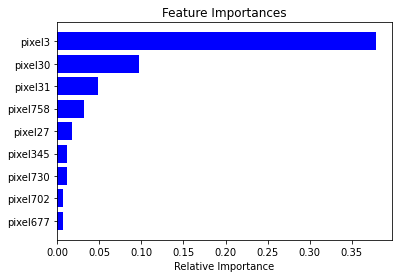

In [ ]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Now, we selected the best(top most) features to reduce the dimentionality in dataset. 

> **SelectFromModel()** : It selects features based on importance of weights.

> **fit_transform()** : This function first fits the data and then transform it.





In [ ]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.pixel2)

## **Backward Feature Elimination**

Steps for Backward Feature Elimination are:

*   Let d be the total number of variables present in the dataset. Take each each variable and train them.
*   Calculate the performance of the model
*   Now, drop one variable then train d-1 models. Do it d times till each variable is dropped at once. Then calculate the performance of the model.
*   Remove the variable which has the smallest change in performance after dropping them.
*   Repeat this process until no variable can be dropped.

> *Note* : This method is generally used when building Linear Regression or Logistic Regression models.

> **RFE()** : This function is used to rank feature using recursive feature elimination.

Bellow is an implementation of linear regression model. Then used recursive feature elimination method and ranked feature. We fitted df and pixel2 column of train dataset and then transformed it.




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10) # Recursive Features Elimination
rfe = rfe.fit_transform(df, train.pixel2)
print(rfe)

[[2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 ...
 [8 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]]


## **Forward Feature Selection**


Forward Feature Selection technique is opposite of bakward selection technique i.e. instead of eliminating featues here features are added one by one such that performance of the model must be improved. Steps are:

*   Start with single feature.
*   Use each feature separtely by training model d number of times.
*   Select those variables which gives best model performance.
*   Repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained.
*   Repeat the steps until the performance of model becomes stable.

> **f_regression()** : This is a linear model to check individual effect of each variable. This is a scoring function to be used in a feature selection procedure.





In [ ]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df,train.pixel2 )

This returns an array containing the F-values of the variables and the p-values corresponding to each F value. For our purpose, we will select the variables having F-value greater than 10:

This gives us the top most variables based on the forward feature selection algorithm.

In [ ]:
variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:
       variable.append(df.columns[i])

In [ ]:
print(variable)

['pixel2', 'pixel3', 'pixel5', 'pixel7', 'pixel8', 'pixel9', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel92', 'pixel93', 'pixel105', 'pixel106', 'pixel107', 'pixel108', 'pixel109', 'pixel110', 'pixel111', 'pixel112', 'pixel113', 'pixel114', 'pixel115', 'pixel116', 'pixel117', 'pixel118', 'pixel119', 'pixel120', 'pixel134', 'pixel135', 'pixel136', 'pixel137', 'pixel138', 'pixel139', 'pixel140', 'pixel141', 'pixel142', 'pixel143', 'pixel144', 'pixel145', 'pixel146', 'pixel147', 'pixel148', 'pixel

**NOTE:** Both Backward Feature Elimination and Forward Feature Selection are time consuming and computationally expensive.They are practically only used on datasets that have a small number of input variables.

## **Singular Value Decomposition**

**Definition** : 

 Any rectangular matrix $A$ can be decomposed into three matrices of particular shapes and characteristics:

#### \begin{align}A = U \Sigma V^T\end{align}

Here, 
* $U$ and $V$ are orthogonal matrices i.e. 
#### \begin{align} U^TU = V^TV = I \end{align}
* $\Sigma$ is a diagonal matrix containing the singular values of $X$, which can be positive, zero, or negative.

Here, we created Dataframe df_train where we removed column label. And printed out output.


In [ ]:
df_train = train.drop(['label'],axis=1)
df_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,144,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Created a variable(feat_cols) which contains the value of all column names.

In [ ]:
feat_cols=df_train.columns.values
print(feat_cols)

['pixel1' 'pixel2' 'pixel3' 'pixel4' 'pixel5' 'pixel6' 'pixel7' 'pixel8'
 'pixel9' 'pixel10' 'pixel11' 'pixel12' 'pixel13' 'pixel14' 'pixel15'
 'pixel16' 'pixel17' 'pixel18' 'pixel19' 'pixel20' 'pixel21' 'pixel22'
 'pixel23' 'pixel24' 'pixel25' 'pixel26' 'pixel27' 'pixel28' 'pixel29'
 'pixel30' 'pixel31' 'pixel32' 'pixel33' 'pixel34' 'pixel35' 'pixel36'
 'pixel37' 'pixel38' 'pixel39' 'pixel40' 'pixel41' 'pixel42' 'pixel43'
 'pixel44' 'pixel45' 'pixel46' 'pixel47' 'pixel48' 'pixel49' 'pixel50'
 'pixel51' 'pixel52' 'pixel53' 'pixel54' 'pixel55' 'pixel56' 'pixel57'
 'pixel58' 'pixel59' 'pixel60' 'pixel61' 'pixel62' 'pixel63' 'pixel64'
 'pixel65' 'pixel66' 'pixel67' 'pixel68' 'pixel69' 'pixel70' 'pixel71'
 'pixel72' 'pixel73' 'pixel74' 'pixel75' 'pixel76' 'pixel77' 'pixel78'
 'pixel79' 'pixel80' 'pixel81' 'pixel82' 'pixel83' 'pixel84' 'pixel85'
 'pixel86' 'pixel87' 'pixel88' 'pixel89' 'pixel90' 'pixel91' 'pixel92'
 'pixel93' 'pixel94' 'pixel95' 'pixel96' 'pixel97' 'pixel98' 'pixel99'
 'pix

Then imported **TruncatedSVD** from sklearn library for dimentionality reduction.

> **TruncatedSVD()** : This transformer performs linear dimensionality reduction by means of truncated SVD.

Here, fitted transform is calculated for the column values of df_train Dataframe. Then dimentionality reduction is calculated via TruncatedSVD() function.

In [ ]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df_train[feat_cols].values)

Here, we used matplotlib library to plot SVD Components:

> **figure()** : This is used to create a new figure or active exsisting figure.

> **title()** : Gives title to graph.

> **scatter()** : Used to observe relationship between variables and uses dots to represent the relationship between them.

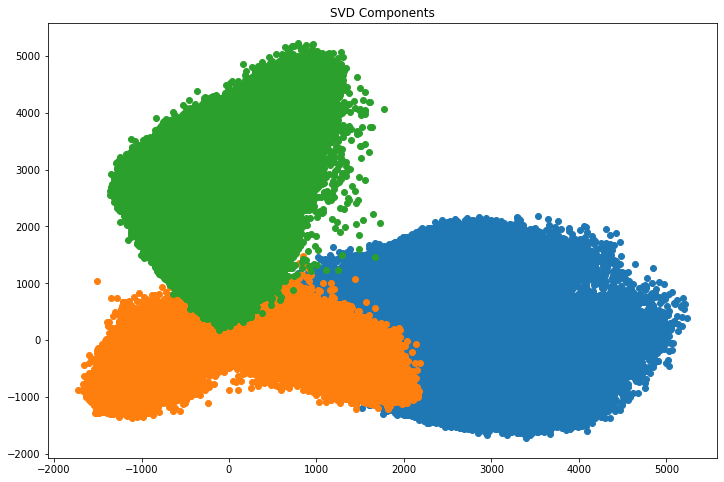

In [ ]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

## **Principal Component analysis**

To extract new set of variables from the existing set of variables in known as **Principal Component Abalysis**. The newly extracted variables is known as **Principal Components.**

**Properties**:

*   Principal componenta are the linear combination of the original variables.
*   1st PC: Explains maximum variance in dataset
*   2nd PC: Tries to explain the remaining variance in dataset and is uncorrelated to 1st PC
*   3rd PC: Explain variance which is not in the above two.

Each additional dimension we add to the PCA technique captures less and less of the variance in the model. The first component is the most important one, followed by the second, then the third, and so on.

**PCA()** : This function is used to calculate PCA.

**Parameters** : 
1. *n_components* : Number of components to keep(here 4)

Here, fitted transform(fit_transform) is calculated for the column values of df_train Dataframe. Then dimentionality reduction is calculated via PCA() function.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_train[feat_cols].values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

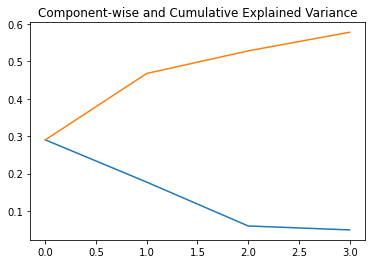

In [ ]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

## **Linear Discriminant Analysis**

LDA is a dimentionality reduction technique used for data preprocessing. LDA is used to find the axes that maximize the separation between multiple classes instead PCA is used to find the component axes that maximize the variance of our data.

Steps to perform LDA:

*   Calculate d-dimensional mean vectors for the different classes from the dataset
*   Calculate scatter matrix.
*   Calculate eigen values and corresponding eigen vectors for scatter matrix.
*   Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W
*   Use this d×k eigenvector matrix to transform the samples onto the new subspace



In this section we imported LinerDisscriminantAnalysis as LDA from sklearn.discriminant_analysis.

LDA() library is used here for dimentionality reduction. Such that the parameter n_components(number of components to be selected) is set as 2.

Then fit_transform is calculated between the column values of df_train Dataframe and train labels. 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(df_train, train.label)

Here, I created a function plot_scikit_lda() to plot a graph for LDA().

In [ ]:
def plot_scikit_lda(df_train, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=df_train[:,0][train.label == label],
                    y=df_train[:,1][train.label == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,)

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()


No handles with labels found to put in legend.


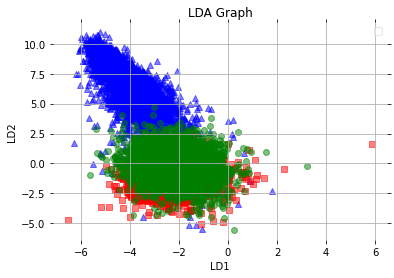

In [ ]:
plot_scikit_lda(X_lda_sklearn, title='LDA Graph')

# **PART - B**

# **Load Data**

Here, we are loading lext file named nlp_ojha_sir.txt.

*   open(): It is used to open the file provided path of the file should be given as first argument and other optional argument as 'r' open for reading and 'w' open for writing.
*   read(): This reads the entire file.
*   close(): Used to close the file or instead of this we can start the program with "with()" statement to close 


In [ ]:
# load text
filename = '/nlp_ojha_sir.txt'
file = open(filename, 'rt')
base_text = file.read()
file.close()

# **Manual Tokenization**

### *Definition*
Spliting whole text document, sentences, phrases or words into smaller units in individual terms is refered as **tokenization**. These smaller units are known as **tokens.**

These **tokens** are punctuation marks, numbers or words. Its **important** to tokenize because we can easily interpret the meaning of text by spliting it into smaller parts.

### **Split By WhiteSpace**

The *first* *step* to maunally tokenize the text is to split it by whitespace.

Using ***split***() function.

*Syntax* : str.split(separator, maxsplit)

> separator: By deafult whitespace is separator. Specifies separator according to which we have to split the string

> maxsplit: means max time we have to split the text

*Returns*: A list of string

In [ ]:
# split into words by white space
words = base_text.split()
print(words[:10])

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories,', 'by']


Another way of spliting a sentence in python is usig ***RegEx*** ***module***. 

***Regular Expression*** is a special character sequence that helps us to match or find other strings using given sequence as a pattern.

***re.split()*** : This function split string according to the provided pattern. Here, non-alphanumeric charecters. And returns empty string if their are capturing groups.

**\W** : Matches any non-alphanumeric character

> *Alphanumeric character* are numbers(0-9), alphabets(a-z, A-Z) and comman symbols like @ # * and &.

*Returns*: List of strings



In [ ]:
import re
# split based on words only
words = re.split(r'\W+', base_text)
print(words[:100])

['', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'Title', 'Best', 'Russian', 'Short', 'Stories', 'Author', 'Various', 'Release', 'Date', 'September', '11', '2004', 'EBook', '13437', 'Last', 'Updated', 'July', '27', '2015', 'Language', 'English', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', 'Produced', 'by', 'David', 'Starner', 'Keith', 'M', 'Eckrich', 'and', 'the', 'Project']


### **Remove Punctuation**

After spliting the text by whitespaces we want to remove puntuation marks. 

Punctuations in string library of python is found using **string.punctuation**.

Here, we printed all the punctuations marks provided by string library in python.

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


This block remove punctuation from given text doccument.

I are using regex module to remove punctuations.

> ***compile():*** This function is similar to match() function in regex module. It is used for pattern matching.


> ***escape():*** Return string with all non-alphanumerics backslashed


> ***sub():*** This function replaces word(obtained by spliting) by blank spaces i.e nothing.

In the next code block I matched the all alphanumeric characters with all non-alphanumeric blackslashed character. Then replaced it with blank spaces if they are present in words(output after removing whitespaces).

In [ ]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]
print(stripped[:100])

['', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'Title', 'Best', 'Russian', 'Short', 'Stories', 'Author', 'Various', 'Release', 'Date', 'September', '11', '2004', 'EBook', '13437', 'Last', 'Updated', 'July', '27', '2015', 'Language', 'English', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', 'Produced', 'by', 'David', 'Starner', 'Keith', 'M', 'Eckrich', 'and', 'the', 'Project']


Sometimes text data may contain non-printable characters. 

We can use a similar approach to filter out all non-printable characters by selecting the inverse of the `string.printable` constant.

> ***string.printable*** : Returns punctuations, digits, ascii_letters and whitespace.

Here, We are replacing all non-printable charcters by blank space and then printing out result.

In [ ]:
re_print = re.compile('[^%s]' % re.escape(string.printable))
result = [re_print.sub('', w) for w in stripped]

In [ ]:
print(result)

['', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'Title', 'Best', 'Russian', 'Short', 'Stories', 'Author', 'Various', 'Release', 'Date', 'September', '11', '2004', 'EBook', '13437', 'Last', 'Updated', 'July', '27', '2015', 'Language', 'English', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', 'Produced', 'by', 'David', 'Starner', 'Keith', 'M', 'Eckrich', 'and', 'the', 'Project', 'Gutenberg', 'Online', 'Distributed', 'Proofreaders', 'Team', 'Illustration', 'ANTON', 'P', 'CHEKHOV', 'RUSSIA', 'S', 'GREATES

### **Normalizing Case**

After removing punctuation, next step of tokenization is to Normalize the data.

Here, I normalized list obtained after removing punctuation into lower() case. Then printed out the output.

> ***lower()*** : Python using lower() method to convert all the letters to lower case.



In [ ]:
result1 = [word.lower() for word in result]
print(result1)

['', 'the', 'project', 'gutenberg', 'ebook', 'of', 'best', 'russian', 'short', 'stories', 'by', 'various', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'title', 'best', 'russian', 'short', 'stories', 'author', 'various', 'release', 'date', 'september', '11', '2004', 'ebook', '13437', 'last', 'updated', 'july', '27', '2015', 'language', 'english', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stories', 'produced', 'by', 'david', 'starner', 'keith', 'm', 'eckrich', 'and', 'the', 'project', 'gutenberg', 'online', 'distributed', 'proofreaders', 'team', 'illustration', 'anton', 'p', 'chekhov', 'russia', 's', 'greates

# **Tokenization and Cleaning with NLTK**

Natural Language Toolkit or NLTK is a Python library. It is used for Natural Language Processing or NLP which is used for building applications such as Text classification, intelligent chatbot, sentimental analysis, language translation, etc. 

NLTK provides good tools for loading and cleaning text that we can use to get our
data ready for working with machine learning and deep learning algorithms.

Here, we imported nltk and downloaded required libraries.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Split Into Sentences**

It is a first step to tokenize the text using nltk library.

> ***sent_tokenize()*** : It is used to tokenize text in smaller sentences. 

*Returns* : List of strings such that each element in a list is a sentence.

Here, sentence tokenization is done in base_text data. Then 1st etement of list(1st sentence) is printed.

> *Note* : Their is no full stop after Various. Therefore 1st statement is till 1st full stop.



In [ ]:
from nltk import sent_tokenize

# split into sentences
sentences = sent_tokenize(base_text)
print(sentences[0])

﻿The Project Gutenberg EBook of Best Russian Short Stories, by Various

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.


## Split Into Words

We can also tokenize the given text in words, punctuations or numbers.

> ***word_tokenize()*** : It is used to tokenize(break into smaller parts) text doccument or sentence into words, punctuations or numbers. It splits tokens based on white space and punctuation.

*Returns* : List of strings such that list elements are words or punctuations.



In [ ]:
from nltk.tokenize import word_tokenize

# split into words
tokens = word_tokenize(base_text)
print(tokens[:100])

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', ',', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.net', 'Title', ':', 'Best', 'Russian', 'Short', 'Stories', 'Author', ':', 'Various', 'Release', 'Date', ':', 'September', '11', ',', '2004', '[', 'EBook', '#', '13437', ']', 'Last', 'Updated', ':', 'July', '27', ',', '2015', 'Language', ':', 'English', '***', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES']


## Filter Out Punctuation

After word tokenization I found that non-alphabtic characters like puntuation marks are also present in list items. 

To remove those puntuation marks I used list comprehension where I only allowed words to print that are alphabetic in nature.

> ***isalpha()*** : It checks if the character passed is alphabetic in nature or not.



In [ ]:

# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'Title', 'Best', 'Russian', 'Short', 'Stories', 'Author', 'Various', 'Release', 'Date', 'September', 'EBook', 'Last', 'Updated', 'July', 'Language', 'English', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', 'Produced', 'by', 'David', 'Starner', 'Keith', 'Eckrich', 'and', 'the', 'Project', 'Gutenberg', 'Online', 'Distributed', 'Proofreaders', 'Team', 'Illustration', 'ANTON', 'CHEKHOV', 'RUSSIA', 'GREATEST', 'WRITER', 'BEST', 'RUSSIAN']


## Filter out Stop Words (and Pipeline)

***Stop Words*** : The commanly used words in english language is known as stop words. They alone do not have any significance or deep meaning. 'i', 'and', 'me', 'it', 'an' etc are some examples of stop words.

NLTK provides a library **stopwords.words()** to display all the stop words in the given language. Here, english.

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

After diplaying stop words. For data pre-processing we have to clean it. 

Here, I used list comprehension where I used the concept if the w (in words) is not equal to word in stop word then insert it in list words. Then printed it.

In [ ]:
# filter out stop words
words = [w for w in words if not w in stop_words]
print(words[:100])

['Project', 'Gutenberg', 'EBook', 'Best', 'Russian', 'Short', 'Stories', 'Various', 'This', 'eBook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'give', 'away', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'eBook', 'online', 'Title', 'Best', 'Russian', 'Short', 'Stories', 'Author', 'Various', 'Release', 'Date', 'September', 'EBook', 'Last', 'Updated', 'July', 'Language', 'English', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', 'Produced', 'David', 'Starner', 'Keith', 'Eckrich', 'Project', 'Gutenberg', 'Online', 'Distributed', 'Proofreaders', 'Team', 'Illustration', 'ANTON', 'CHEKHOV', 'RUSSIA', 'GREATEST', 'WRITER', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', 'Compiled', 'Edited', 'THOMAS', 'SELTZER', 'CONTENTS', 'INTRODUCTION', 'THE', 'QUEEN', 'OF', 'SPADES', 'THE', 'CLOAK', 'THE', 'DISTRICT', 'DOCTOR', 'THE', 'CHRISTMAS', 'TREE', 'AND', 'THE', 'WEDDING', 'GOD', 'SEES', 'THE']

## Stem Words

***Stemming*** : The process of reducing words to it's root word is known as stemming. Example : play is root word of played or played or players etc.

Stemming is used in search engines and to determine domain vocabularies in domain analysis.


> ***stem()*** : It is a package which performs stemming in different packages. PorterStemmer() is one of them.

> ***PorterStemmer()*** : It uses surfix striping to produce stems.

Here, We stripped out surfix using PorterStemmer() package for each word, after filtering out stop words. 



In [ ]:
from nltk.stem.porter import PorterStemmer

# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]
print(stemmed[:100])

['project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stori', 'variou', 'thi', 'ebook', 'use', 'anyon', 'anywher', 'cost', 'almost', 'restrict', 'whatsoev', 'you', 'may', 'copi', 'give', 'away', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'titl', 'best', 'russian', 'short', 'stori', 'author', 'variou', 'releas', 'date', 'septemb', 'ebook', 'last', 'updat', 'juli', 'languag', 'english', 'start', 'OF', 'thi', 'project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stori', 'produc', 'david', 'starner', 'keith', 'eckrich', 'project', 'gutenberg', 'onlin', 'distribut', 'proofread', 'team', 'illustr', 'anton', 'chekhov', 'russia', 'greatest', 'writer', 'best', 'russian', 'short', 'stori', 'compil', 'edit', 'thoma', 'seltzer', 'content', 'introduct', 'the', 'queen', 'OF', 'spade', 'the', 'cloak', 'the', 'district', 'doctor', 'the', 'christma', 'tree', 'and', 'the', 'wed', 'god', 'see', 'the']


# **Prepare Text Data with scikit-learn**

The scikit-learn library provides 3 different schemes that we can use.

## **Word Counts with CountVectorizer**

***CountVectorizer*** is used to build collection of text doccuments and to biuld vocabulary of known words.

In the bellow code we:

*   Created an instance of **CountVectorizer()** class.
*   Called the **fit()** function in order to learn a vocabulary from one or more documents.
*   Called the **transform()** function on one or more documents as needed to encode each as a vector.

We get an encoded vector with entire vocabulary with number of times each word has appeared in doccument.

The vector obtained after transformation will be sparse vector. They are called sparse because they contain lots of zeros. To return it into normal numpy array we use **toarray()** function.

Here, we used stemmed data found as output of above code to find the vocabulary. Then followed by encoding of document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(stemmed)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(stemmed)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'project': 4048, 'gutenberg': 2382, 'ebook': 1645, 'best': 506, 'russian': 4460, 'short': 4689, 'stori': 5033, 'variou': 5679, 'thi': 5305, 'use': 5643, 'anyon': 227, 'anywher': 231, 'cost': 1114, 'almost': 148, 'restrict': 4338, 'whatsoev': 5851, 'you': 6002, 'may': 3234, 'copi': 1099, 'give': 2251, 'away': 375, 'term': 5272, 'licens': 3059, 'includ': 2686, 'onlin': 3617, 'titl': 5377, 'author': 360, 'releas': 4266, 'date': 1253, 'septemb': 4610, 'last': 3002, 'updat': 5632, 'juli': 2896, 'languag': 2991, 'english': 1735, 'start': 4985, 'of': 3588, 'produc': 4033, 'david': 1255, 'starner': 4983, 'keith': 2918, 'eckrich': 1647, 'distribut': 1492, 'proofread': 4057, 'team': 5247, 'illustr': 2632, 'anton': 221, 'chekhov': 845, 'russia': 4459, 'greatest': 2330, 'writer': 5975, 'compil': 999, 'edit': 1655, 'thoma': 5322, 'seltzer': 4591, 'content': 1076, 'introduct': 2812, 'the': 5285, 'queen': 4133, 'spade': 4901, 'cloak': 929, 'district': 1494, 'doctor': 1512, 'christma': 884, 'tree': 5

Accessing the vocabulary to see what exactly was tokenized by calling:

In [ ]:
print(vectorizer.vocabulary_)

{'project': 4048, 'gutenberg': 2382, 'ebook': 1645, 'best': 506, 'russian': 4460, 'short': 4689, 'stori': 5033, 'variou': 5679, 'thi': 5305, 'use': 5643, 'anyon': 227, 'anywher': 231, 'cost': 1114, 'almost': 148, 'restrict': 4338, 'whatsoev': 5851, 'you': 6002, 'may': 3234, 'copi': 1099, 'give': 2251, 'away': 375, 'term': 5272, 'licens': 3059, 'includ': 2686, 'onlin': 3617, 'titl': 5377, 'author': 360, 'releas': 4266, 'date': 1253, 'septemb': 4610, 'last': 3002, 'updat': 5632, 'juli': 2896, 'languag': 2991, 'english': 1735, 'start': 4985, 'of': 3588, 'produc': 4033, 'david': 1255, 'starner': 4983, 'keith': 2918, 'eckrich': 1647, 'distribut': 1492, 'proofread': 4057, 'team': 5247, 'illustr': 2632, 'anton': 221, 'chekhov': 845, 'russia': 4459, 'greatest': 2330, 'writer': 5975, 'compil': 999, 'edit': 1655, 'thoma': 5322, 'seltzer': 4591, 'content': 1076, 'introduct': 2812, 'the': 5285, 'queen': 4133, 'spade': 4901, 'cloak': 929, 'district': 1494, 'doctor': 1512, 'christma': 884, 'tree': 5

We observe:

*   By default all words were made lower case.
*   All punctuations were ignored.

Importantly, the same vectorizer can be used on documents that contain words not included
in the vocabulary. 

These words are ignored and no count is given in the resulting vector. 

Running this example prints the array version of the encoded sparse vector showing one occurrence of the no word in the vocab.

In [ ]:
# encode another document
text2 = ["the puppy"]
vector = vectorizer.transform(text2)
print(vector.toarray())

[[0 0 0 ... 0 0 0]]


## **TF(Term Frequency)-IDF(Inverse Document Frequency)**

Word count is very basic approach. It counts for every words. Even for words like 'the', 'an' etc. which is not very useful.

TF-IDF is an atternative way to count words in doccument. 


> ***TF(Term Frequency)*** : Summarizes how often a given word appears within a document

**Formula**
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)


> ***IDF(Inverse Document Frequency)*** : This downscales words that appear a lot across documents.

**Formula**
* IDF(t) = log_e(Total number of documents / Number of documents with term t in it)







## **Word Frequencies with `TfidfVectorizer`**

Word count is very basic approach. It counts for every words. Even for words like 'the', 'an' etc. which is not very useful.

TF-IDF is an atternative way to count words in doccument. 

* **Term Frequency**: This summarizes how often a given word appears within a document.
* **Inverse Document Frequency**: This downscales words that appear a lot across documents.

The `TfidfVectorizer` will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternately, if you already have a
learned CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse
document frequencies and start encoding documents. 

Then follow the same:
*   fit() the model
*   transform() the model 

Bellow example shows the TfidVectorizer to learn vocabulary and inverse document frequencies and then encode one of those doccuments to numpy array. We used stemmed document to find vocabulary.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(stemmed)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([stemmed[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'project': 4048, 'gutenberg': 2382, 'ebook': 1645, 'best': 506, 'russian': 4460, 'short': 4689, 'stori': 5033, 'variou': 5679, 'thi': 5305, 'use': 5643, 'anyon': 227, 'anywher': 231, 'cost': 1114, 'almost': 148, 'restrict': 4338, 'whatsoev': 5851, 'you': 6002, 'may': 3234, 'copi': 1099, 'give': 2251, 'away': 375, 'term': 5272, 'licens': 3059, 'includ': 2686, 'onlin': 3617, 'titl': 5377, 'author': 360, 'releas': 4266, 'date': 1253, 'septemb': 4610, 'last': 3002, 'updat': 5632, 'juli': 2896, 'languag': 2991, 'english': 1735, 'start': 4985, 'of': 3588, 'produc': 4033, 'david': 1255, 'starner': 4983, 'keith': 2918, 'eckrich': 1647, 'distribut': 1492, 'proofread': 4057, 'team': 5247, 'illustr': 2632, 'anton': 221, 'chekhov': 845, 'russia': 4459, 'greatest': 2330, 'writer': 5975, 'compil': 999, 'edit': 1655, 'thoma': 5322, 'seltzer': 4591, 'content': 1076, 'introduct': 2812, 'the': 5285, 'queen': 4133, 'spade': 4901, 'cloak': 929, 'district': 1494, 'doctor': 1512, 'christma': 884, 'tree': 5

### Word frequency on Original data

In the above example I found Word Frequencies using TfidVectorizer using already tokenized and cleanned up doccument output.

Here, I'm using original data to find Word Frequencies.

The procedure followed is same:

*   Used sentence tokenization in original text.
*   Created an instance of TfidfVectorizer().
*   Toknized and builded vocabulary using fit().
*   Encoded doccument using transform.





In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# split into sentences
base_text = sent_tokenize(base_text)

# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(base_text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([base_text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 8170, 'project': 6243, 'gutenberg': 3742, 'ebook': 2628, 'of': 5518, 'best': 880, 'russian': 6921, 'short': 7267, 'stories': 7785, 'by': 1179, 'various': 8709, 'this': 8213, 'is': 4430, 'for': 3303, 'use': 8660, 'anyone': 445, 'anywhere': 449, 'at': 618, 'no': 5406, 'cost': 1815, 'and': 396, 'with': 9073, 'almost': 344, 'restrictions': 6735, 'whatsoever': 8969, 'you': 9184, 'may': 5013, 'copy': 1790, 'it': 4438, 'give': 3550, 'away': 690, 'or': 5588, 're': 6461, 'under': 8532, 'terms': 8148, 'license': 4739, 'included': 4195, 'online': 5562, 'www': 9159, 'net': 5371, 'title': 8293, 'author': 666, 'release': 6599, 'date': 2030, 'september': 7143, '11': 2, '2004': 19, '13437': 5, 'last': 4655, 'updated': 8647, 'july': 4512, '27': 22, '2015': 20, 'language': 4641, 'english': 2771, 'start': 7705, 'produced': 6222, 'david': 2033, 'starner': 7702, 'keith': 4537, 'eckrich': 2632, 'distributed': 2410, 'proofreaders': 6260, 'team': 8108, 'illustration': 4108, 'anton': 438, 'chekhov': 13

## **Hashing with HashingVectorizer**

In above methods counts and frequencies are using to count the number of words. But the main disadvantage is vocalbulary becomes very large which in turn require large vectors for encoding henceforth slow down algorithms and require more space.

In order to remove this ambiguity hash of words is used to convert them to integers. 

We do not need to find vocabulary in Hashing and we can also choose long-fixed length vector.

We cannot convert the enncoded vector to word which is major downside of Hashing.

The `HashingVectorizer` class implements this approach that can be used to consistently
hash words, then tokenize and encode documents as needed. 



> *Note* : This vectorizer does not require a call to fit on the training data documents. It can be directly used to call encoding doccuments.

Here, stemmed document is used for encoding.

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(stemmed)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(51839, 20)
[[-1.  0.  0. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


# **The Bag-of-Words Model**

The simplest way to represent text to words is done through Bag-of-words when modeling through machine learning algorithm.

We can represent sentence into a bag of words vector. It is simple to understand and easy to implement.

## **What is a Bag-of-Words?**

To extract features from the text for modeling purpose Bag-of-Words or BoW is used. 

Bag of Words model is used to preproces the text by converting it into a bag of words

**It involves two things:**
* A vocabulary of known words.
* A measure of the presence of known words.

Information about structure or order of words is discarded in document. The model is only concerned with whether known words occur in the document, not where in the document.

**BOW is used in:**

*   Natural language processing
*   Information retrieval from documents
*   Document classifications




### Example of the Bag-of-Words Model

Let their be three types of movie review

**Step 1: Collect Data**

*   Review 1: This movie is very scary and long
*   Review 2: This movie is not scary and is slow
*   Review 3: This movie is spooky and good

**Step 2: Design the Vocabulary**

*Vocabulary* (11 words) : ‘This’, ‘movie’, ‘is’, ‘very’, ‘scary’, ‘and’, ‘long’, ‘not’,  ‘slow’, ‘spooky’,  ‘good’

**Step 3: Create Document Vectors**

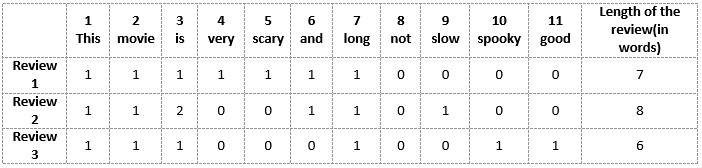



Vector of Review 1: [1 1 1 1 1 1 1 0 0 0 0]

Vector of Review 2: [1 1 2 0 0 1 1 0 1 0 0]

Vector of Review 3: [1 1 1 0 0 0 1 0 0 1 1]

This is the idea of Bag-of-Words.


## **Managing Vocabulary**

Now our major task is to reduce the size of vocabulary when using bag-of-words model.

This data pre-processing task is performed by:

* Ignoring case.
* Ignoring punctuation.
* Ignoring frequent words that don't contain much information, called stop words, like a, of, etc.
* Fixing misspelled words.
* Reducing words to their stem (e.g. play from playing) using stemming algorithms.

Another better way to manage vocabulary is to create a vocabulary of graouped words.

In this approach each letter or word is called **gram**. 

> **bigram** : Vocabulary created using two word pair.

> **3-gram** : Vocabulary created using three word pair.





## **Scoring Words**

**Scoring**: The number of times the word has occured in document is known as scoring.

We implemented two scoring methods:

*   **Count** : The number of times word has occured in document.
*   **Frequency** : Calculate the frequency that each word appears in a document out of all the words in the document.



In [ ]:
# load text
filename = '/nlp_ojha_sir.txt'
file = open(filename, 'rt')
base_text = file.read()
file.close()

# word toknization
tokens = word_tokenize(base_text)
print(tokens[:100])

# making a list of only aphlanumeric characters.
words = [word for word in tokens if word.isalpha()]
print(words[:100])

# removing stop words
words = [w.lower() for w in words if not w in stop_words]
print(words[:100])

# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]
print(stemmed[:100])

# Using CountVectorizer to find scoring of words in document
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(stemmed)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(stemmed)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

# Using TfidfVectorizer() to find frequency of words in documents
# create the transform
vectorizer1 = TfidfVectorizer()
# tokenize and build vocab
vectorizer1.fit(stemmed)
# summarize
print(vectorizer1.vocabulary_)
print(vectorizer1.idf_)
# encode document
vector1 = vectorizer1.transform([stemmed[0]])
# summarize encoded vector
print(vector1.shape)
print(vector1.toarray())

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', ',', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.net', 'Title', ':', 'Best', 'Russian', 'Short', 'Stories', 'Author', ':', 'Various', 'Release', 'Date', ':', 'September', '11', ',', '2004', '[', 'EBook', '#', '13437', ']', 'Last', 'Updated', ':', 'July', '27', ',', '2015', 'Language', ':', 'English', '***', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES']
['Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'an

## **Drawbacks:**

*   Length of vector increases if new sentence contain new words as vocabulary increases.
*   Since vector contain many 0s. Therefore it results in sparse matrix.
*   No information on the grammar of the sentences nor on the ordering of the words in the text is retained back.